***Jeyshinee Pyneeandee, April 2024*** <br>
## ISIS Metadata Reading Accuracy QA (ISIS A & B)
This script is to manually test the accuracy of KERAS for its metadata reading. The script tests ISIS A and ISIS B ionograms separately. 

In [1]:
#required imports
import matplotlib.pyplot as plt
import os
from random import randrange
import csv
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

In [2]:
rootDir = 'L:/DATA/ISIS/'

imageDir1 = rootDir + 'ISIS_101300030772/'
imageDir2 = rootDir + 'ISIS_102000056114/'
imageDir3 = rootDir + 'raw_upload_20230421/'

logDir = rootDir + 'ISIS_Test_Metadata_Analysis/MERGED/'

In [3]:
sample_size = 50

We first read the ISIS 1 master file as a dataframe.

In [5]:
df_master_ISIS_1 = pd.read_csv(logDir + 'ISIS-1_MD_Version6.csv', low_memory= False)

## ISIS A Ionograms

We will randomly sample 50 ISIS A ionograms from the master results file to test accuracy. Before that, we filter for metadata read with a time quality of 1,2 or 3.

In [6]:
time_quality = [1,2,3]
results_file = df_master_ISIS_1.loc[df_master_ISIS_1['Time_quality'].isin(time_quality)]
selected_rows_num = results_file.sample(sample_size)

In [146]:
selected_rows_num.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
176932,NaN,2,1973,205,15,13,15,Image0354.png,R014207708,B1-35-13 ISIS A C-1882,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
266695,NaN,2,1970,104,4,37,58,Image0168.png,b23_R014207876,B1-34-63 ISIS A C-1067,...,3,21,1,"Orroral, Australia",ORR,21,-35.37,148.57,35.6S,149E
190053,NaN,4,1972,305,14,1,25,Image0012.png,R014207899,B1-35-9 ISIS A C-1662,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
10735,NaN,3,1971,255,11,55,31,Image0106.png,b13_R014207853,B1-35-11 ISIS A C-1787,...,3,69,1,"Tromso, Norway",TRO,69,69.39,18.56,69.7N,18.9E
40537,NaN,2,1970,228,23,6,23,Image0175.png,b10_R014207713,B1-34-61 ISIS A C-951,...,3,8,1,"Santiago, Chile",AGO,8,-33.08,289.19,33.2S,70.1W


In [158]:
#additional sample of 50 
second_sample_A = results_file.sample(sample_size)
second_sample_A.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
78861,"OCR read ""Hour"" above 24",7,1971,44,28,15,39,Image0006.png,R014207849,B1-35-6 ISIS A C-1506,...,3,43,1,"Resolute Bay, Canada",RES,43,74.41,265.07,74.7N,95W
296623,NaN,4,1972,240,2,28,8,Image0012.png,R014207854,B1-35-12 ISIS A C-1842,...,3,74,1,"Colomb Bechar, Algeria",HMG,74,30.49,358.00,31.37N,21W
121786,NaN,3,1972,118,10,9,54,Image0403.png,b16_R014207847,B1-35-5 ISIS A C-1406,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
25661,NaN,6,1971,11,3,51,36,Image0003.png,b27_R014207898,B1-35-8 ISIS A C-1595,...,3,69,1,"Tromso, Norway",TRO,69,69.39,18.56,69.7N,18.9E
222461,NaN,4,1971,275,10,41,55,Image0249.png,R014207848,B1-35-7 ISIS A C-1577,...,3,16,1,"Johannesburg, South Africa",BUR,16,-25.52,27.42,25.9S,27.7E


In [14]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    
    if os.path.exists(image_path1):
        print ("Image Path:", image_path1)
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        print ("Image Path:", image_path2)
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        print ("Image Path:", image_path3)
        image = Image.open(image_path3)
        image.show()
    else: 
        print ("Image not found")


Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207708\B1-35-13 ISIS A C-1882\Image0354.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b23_R014207876\B1-34-63 ISIS A C-1067\Image0168.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207899\B1-35-9 ISIS A C-1662\Image0012.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1787\Image0106.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b10_R014207713\B1-34-61 ISIS A C-951\Image0175.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1801\Image0159.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b33_R014207877\B1-34-64 ISIS A C-1116\Image0239.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207888\B1-34-52 ISIS A C-382\Image0729.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207854\B1-35-12 ISIS A C-1842\Image0169.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b34_R014207854\B1-35-12 ISIS A C-1861\Image0225.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207888\B1-34-52 ISIS A

In [159]:
for _, row in second_sample_A.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)
    
    if os.path.exists(image_path1):
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        image = Image.open(image_path3)
        image.show()
    else: 
        print ("Image not found")

In [15]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in second_sample_A.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if str(row['Year'])[2:4] != Year:
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Adjusted_Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Filtered.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Please read the metadata for each of the 50 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.


In [130]:
def analyze_batch(path):
    df_num = pd.read_csv(path)
    total = len(df_num)    
    print ('Element Analysis:')
    
    categorical_columns =["Station_Number","Year", "Day",  "Hour", "Minute", "Second"]
    column_sums = {}
    accuracy_data = []
    z_score = 1.96 #norm.ppf(1-(1-confidence_level)/2)

    for column in categorical_columns:
        issue_counts_num = df_num["Issue"].value_counts()
        matches = [word for word in issue_counts_num.index if column in word]
        col_sum = total - (sum(issue_counts_num[matches]))            
        column_sums[column] = col_sum
        p = col_sum / total
        accuracy_percent = p*100
        sample_error = np.sqrt(p*(1-p)/total)*100
        confidence_interval = z_score*sample_error
        
        print(f'Number of "{column}" element categorized correctly:' , col_sum)
        print (f'Percent reading accuracy of the "{column}" element: {accuracy_percent:.2f}%')
        print (f'Sample Error for "{column}" element: {sample_error:.2f}')
        print (f'Confidence Interval for the "{column}" element: {confidence_interval:.2f}')
        
        accuracy_data.append ((column, accuracy_percent,sample_error, confidence_interval))
        
   
    #plotting
    fig = plt.figure(figsize = (10, 5))
    categories, accuracies,sample_error, confidence_interval  = zip(*accuracy_data) 
    bar = plt.bar (categories, accuracies, color = '#2C74BE', edgecolor = '#2C74BE', alpha = 0.7)
    lower_error = np.zeros_like(sample_error)
    error_bar = plt.errorbar(categories, accuracies, yerr = (lower_error, confidence_interval), 
                         linestyle = '', capsize = 10, ecolor = 'black', elinewidth = 2,
                         markeredgewidth = 2)
    plt.ylim(70, 107)

    plt.title (f"% Reading accuracy of the metadata elements", fontweight = 'bold')
    plt.xlabel(f"Metadata elements", fontweight = 'bold')
    plt.ylabel(f"Reading Accuracy (%)", fontweight = 'bold')
    plt.xticks(rotation=90)
    plt.yticks (np.arange(70, 107, step = 10))
    #creating a legend
    legend_handles = [bar[0], error_bar]
    legend_labels = ['% Reading Accuracy', 'Sample Error with 95% Confidence Interval (CI)']
    plt.legend(legend_handles, legend_labels, loc = 'lower left', prop = {'weight':'bold'})

    #adding numbers on top of the error bars and bars
    for i, (bar_height, err_height, conf_interval) in enumerate (zip(accuracies, sample_error, confidence_interval)):
        plus_minus = '\u00B1' # used for +- symbol
        err_text = f'{plus_minus}{conf_interval:.2f}'
        x_pos = i
        y_pos = bar_height + err_height + conf_interval + 2
        if y_pos >100:
            y_pos = 100
        label_end = bar_height + conf_interval + 2
        plt.text(x_pos, label_end, f'{bar_height:.2f}\n{err_text}',  ha = 'center', va = 'bottom', color = 'black', fontsize = 9, weight = 'bold')
    plt.subplots_adjust(bottom = 0.25, top = 1.7, left = 0.1, right= 0.95)
    plt.show()
    return column_sums

Element Analysis:
Number of "Station_Number" element categorized correctly: 49
Percent reading accuracy of the "Station_Number" element: 98.00%
Sample Error for "Station_Number" element: 1.98
Confidence Interval for the "Station_Number" element: 3.88
Number of "Year" element categorized correctly: 50
Percent reading accuracy of the "Year" element: 100.00%
Sample Error for "Year" element: 0.00
Confidence Interval for the "Year" element: 0.00
Number of "Day" element categorized correctly: 48
Percent reading accuracy of the "Day" element: 96.00%
Sample Error for "Day" element: 2.77
Confidence Interval for the "Day" element: 5.43
Number of "Hour" element categorized correctly: 50
Percent reading accuracy of the "Hour" element: 100.00%
Sample Error for "Hour" element: 0.00
Confidence Interval for the "Hour" element: 0.00
Number of "Minute" element categorized correctly: 49
Percent reading accuracy of the "Minute" element: 98.00%
Sample Error for "Minute" element: 1.98
Confidence Interval fo

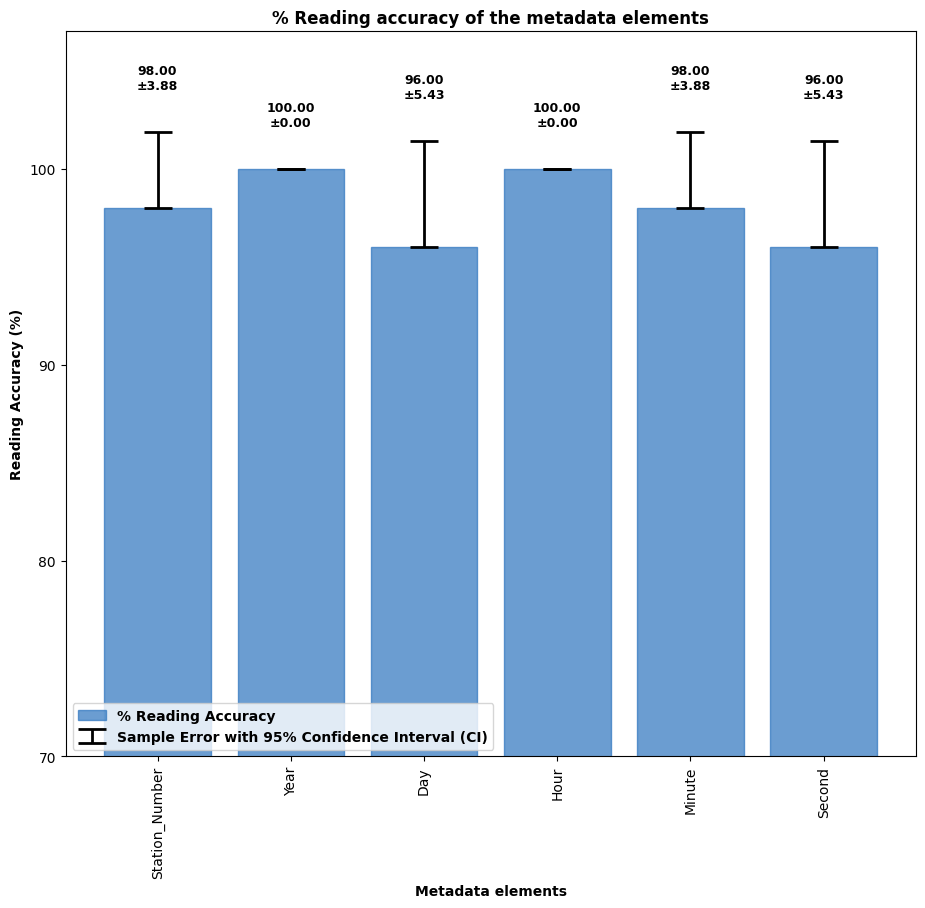

{'Station_Number': 49,
 'Year': 50,
 'Day': 48,
 'Hour': 50,
 'Minute': 49,
 'Second': 48}

In [142]:
analyze_batch('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Filtered.csv')

### Overall summary of ISIS A Ionograms

Total number of scanned ISIS A ionograms: 308077
Number of ISIS A Images manually analyzed: 50
Number of ionograms categorized correctly out of 50: 44
Estimated success rate out of 400647 ionograms with consistent results: 0.88
Sample error: 0.06
Confidence interval: 2.02


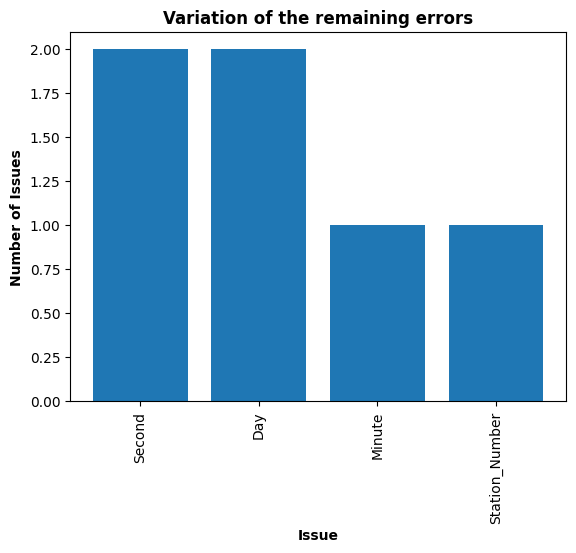

In [156]:
#Total Number of Num Categories
print ('Total number of scanned ISIS A ionograms:', len(df_master_ISIS_1))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Filtered.csv')
total_len = len(df_num)
print ('Number of ISIS A Images manually analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 50:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(df_master_ISIS_1))
print('Estimated success rate out of 400647 ionograms with consistent results:', round(Estimation/len(df_master_ISIS_1),2))

confidence_interval = 0.95
z_score = 1.96
p = Estimation/len(df_master_ISIS_1)
sample_error = round(np.sqrt(p*(1-p)/len(df_master_ISIS_1))*100,2)
confidence_interval = z_score + sample_error
    
print("Sample error:", sample_error)
print("Confidence interval:", confidence_interval)


#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors",fontweight = 'bold')
plt.xlabel("Issue",fontweight = 'bold')
plt.ylabel("Number of Issues",fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()


## ISIS B Ionograms
We now repeat the same process with ISIS B Ionograms.

In [135]:
df_master_ISIS_2 = pd.read_csv(logDir + 'ISIS-2_MD_Version6.csv', low_memory= False)

In [136]:
results_file_B = df_master_ISIS_2.loc[df_master_ISIS_2['Time_quality'].isin(time_quality)]
selected_rows_num_B = results_file_B.sample(sample_size)

In [147]:
selected_rows_num_B.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
124252,NaN,4,1972,335,7,6,24,Image0377.png,b14_R014207878,B1-35-24 ISIS B D-696,...,4,43,1,"Resolute Bay, Canada",RES,43,74.41,265.07,74.7N,95W
310199,NaN,6,1972,183,14,14,27,Image0067.png,R014207777,B1-35-30 ISIS B D-1036,...,4,5,1,"Quito, Ecuador",QUI,5,-0.37,281.25,0.6S,78.6W
324110,NaN,2,1971,315,12,29,13,Image33.png,R014207779,B1-35-25 ISIS B D-731,...,4,16,1,"Johannesburg, South Africa",BUR,16,-25.52,27.42,25.9S,27.7E
73123,NaN,7,1973,0,1,59,45,Image0462.png,b9_R014207778,B1-35-28 ISIS B D-901,...,4,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
264084,NaN,4,1972,72,18,59,39,Image0359.png,b14_R014207878,B1-35-24 ISIS B D-675,...,4,21,1,"Orroral, Australia",ORR,21,-35.37,148.57,35.6S,149E


In [138]:
for _, row in selected_rows_num_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    if os.path.exists(image_path1):
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        image = Image.open(image_path3)
        image.show()

    else: 
        print ("Image not found")
    

In [140]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in selected_rows_num_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if str(row['Year'])[2:4] != Year:
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Adjusted_Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Filtered.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Please read the metadata for each of the 50 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.


Element Analysis:
Number of "Station_Number" element categorized correctly: 49
Percent reading accuracy of the "Station_Number" element: 98.00%
Sample Error for "Station_Number" element: 1.98
Confidence Interval for the "Station_Number" element: 3.88
Number of "Year" element categorized correctly: 50
Percent reading accuracy of the "Year" element: 100.00%
Sample Error for "Year" element: 0.00
Confidence Interval for the "Year" element: 0.00
Number of "Day" element categorized correctly: 48
Percent reading accuracy of the "Day" element: 96.00%
Sample Error for "Day" element: 2.77
Confidence Interval for the "Day" element: 5.43
Number of "Hour" element categorized correctly: 50
Percent reading accuracy of the "Hour" element: 100.00%
Sample Error for "Hour" element: 0.00
Confidence Interval for the "Hour" element: 0.00
Number of "Minute" element categorized correctly: 50
Percent reading accuracy of the "Minute" element: 100.00%
Sample Error for "Minute" element: 0.00
Confidence Interval f

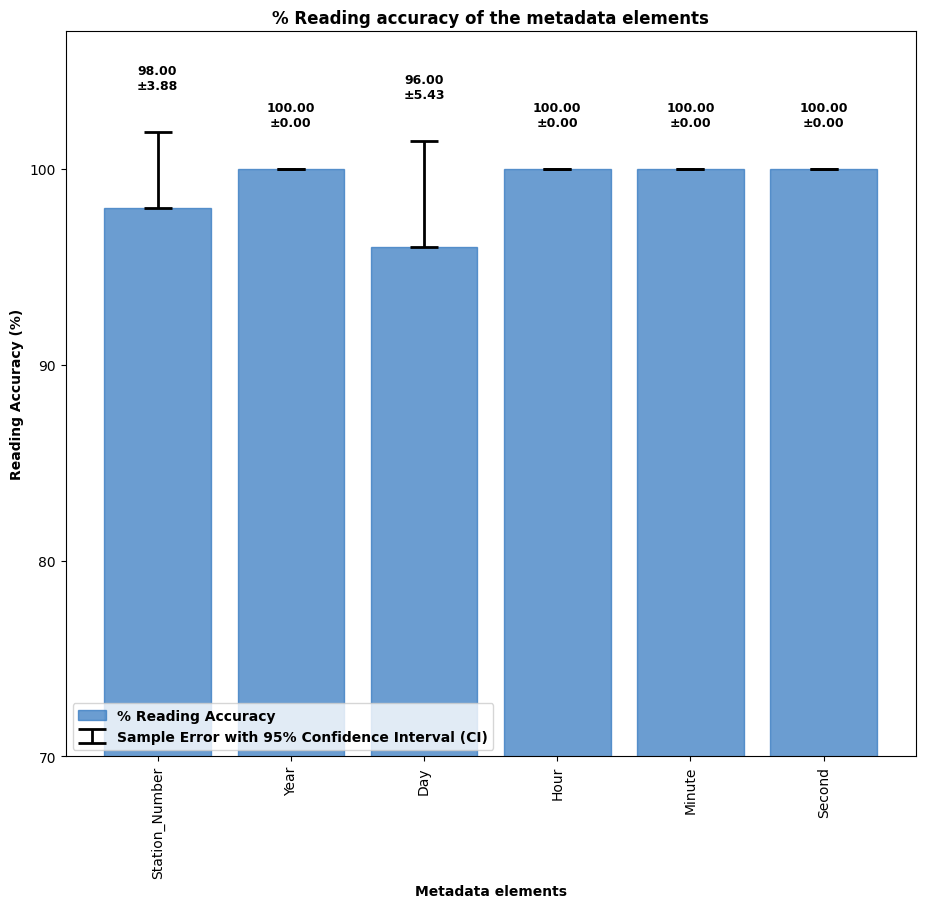

{'Station_Number': 49,
 'Year': 50,
 'Day': 48,
 'Hour': 50,
 'Minute': 50,
 'Second': 50}

In [144]:
analyze_batch('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Filtered.csv')

### Overall summary of ISIS B Ionograms

Total number of scanned ISIS B ionograms: 326715
Number of ISIS B Images manually analyzed: 50
Number of ionograms categorized correctly out of 50: 48
Estimated success rate out of 400647 ionograms with consistent results: 0.96
Sample error: 0.03
Confidence interval: 1.99


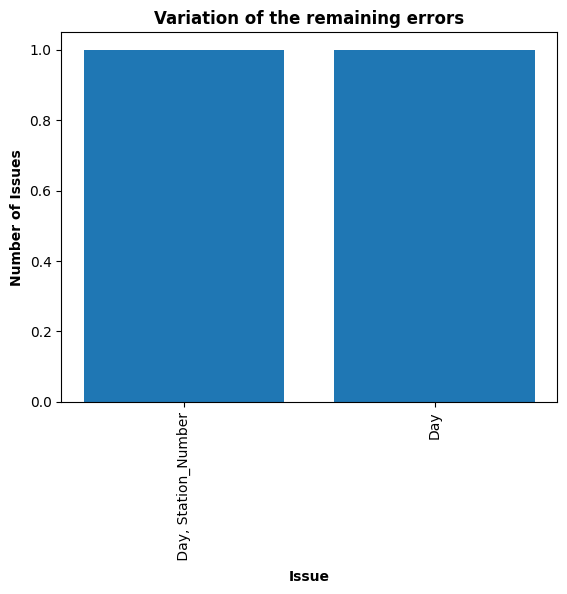

In [157]:
#Total Number of Num Categories
print ('Total number of scanned ISIS B ionograms:', len(df_master_ISIS_2))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Filtered.csv')
total_len = len(df_num)
print ('Number of ISIS B Images manually analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 50:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(df_master_ISIS_2))
print('Estimated success rate out of 400647 ionograms with consistent results:', round(Estimation/len(df_master_ISIS_2),2))

confidence_interval = 0.95
z_score = 1.96
p = Estimation/len(df_master_ISIS_2)
sample_error = round(np.sqrt(p*(1-p)/len(df_master_ISIS_2))*100,2)
confidence_interval = z_score + sample_error
    
print("Sample error:", sample_error)
print("Confidence interval:", confidence_interval)


#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors",fontweight = 'bold')
plt.xlabel("Issue",fontweight = 'bold')
plt.ylabel("Number of Issues",fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()